# Creating first MVP product; on Jun 7 2018

## Install Libraries

#### Python library resource: https://awesome-python.com/

Installations for extra packages: 
- !pip install SpeechRecognition
- !pip install PocketSphinx
- !brew install portaudio
- !pip install pyaudio
- !pip install sumy
- !pip install --upgrade google-api-python-client
- !pip install --upgrade google-cloud-speech
- !pip install oauth2client
- !pip install pyAudioAnalysis ; 2to3 -w *.py; fixes

## Data Sources:

- __[NYT daily from podbay](http://podbay.fm/show/1200361736/e/1527587699?autostart=1)__; 
- NYT daily: https://itunes.apple.com/us/podcast/the-daily/id1200361736?mt=2&ign-mpt=uo%3D4
- Open Audio Source: http://www.openslr.org/resources.php
- Economist: https://www.economist.com/audio-edition/2018-06-02
- Economist text: https://xmuplus.github.io/
- NPR: https://www.npr.org/programs/morning-edition/
- NPR sunday: https://www.npr.org/programs/weekend-edition-sunday/
- Ted talk: https://itunes.apple.com/us/podcast/ted-talks-daily/id160904630?mt=2
- Public meeting: http://www.sbccd.org/Board_of_Trustees/Agendas_and_Minutes
- NPR upfirst: https://www.npr.org/podcasts/510318/up-first
- Congress: https://www.loc.gov/item/sn88063877/

## Speech Recognition

- Real python: https://realpython.com/python-speech-recognition/#working-with-audio-files
- Speech Recognition: https://github.com/Uberi/speech_recognition#readme
- Speech Recognition: https://pypi.org/project/SpeechRecognition/3.2.0/
- Pocket Sphinx: https://pypi.org/project/pocketsphinx/
- Pydub: https://github.com/jiaaro/pydub/blob/master/API.markdown
- Audio processing in python: http://myinspirationinformation.com/uncategorized/audio-signals-in-python/
- Speaker Recognition: https://github.com/orchidas/Speaker-Recognition
- Audio training analysis: https://github.com/tyiannak/pyAudioAnalysis

## Natural Language Processing

- Insight: https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e
- Insight ipynb: https://github.com/hundredblocks/concrete_NLP_tutorial/blob/master/NLP_notebook.ipynb
- Intro/resource: https://github.com/icoxfog417/awesome-text-summarization
- Summy: https://github.com/miso-belica/sumy
- NewsHighlights: https://cs.nyu.edu/~kcho/DMQA/
- Q&AAnswer: https://rajpurkar.github.io/SQuAD-explorer/

## Web App

* Dash audio? https://community.plot.ly/t/audio-recording-feature-in-dash-app/7837
* Flask audio: https://henri.io/posts/streaming-microphone-input-with-flask.html
* Flask example: https://realpython.com/flask-by-example-part-1-project-setup/


## Compeditors

* wrap-up: http://www.wrappup.co/faq/
* trint: https://trint.com/


***
### Import basic libraries
***


In [1]:
## for speech to text
import speech_recognition as sr


## for audio processing and analytical study
from pydub import AudioSegment ##for audio spliting
from pydub.silence import split_on_silence
from pydub.playback import play

## for audio collection
import pyaudio
import wave

## for text recognition
import nltk
import string
import json

## for general studies
from os import listdir
from os.path import isfile, join
import glob
from numpy import fft as fft
import matplotlib.pyplot as plt
import numpy as np
import sys
import seaborn as sns
sns.set_style("white")
from tqdm import tqdm
import time as time
import multiprocessing as mp

## My codes
from src.utils import wer
from src.utils import SoundToText
from src.utils import PrepareSound

## settings
%matplotlib inline

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

/Users/renormalization/anaconda/lib/python3.6/site-packages/pydub/utils.py:187: RuntimeWarning: Couldn't find ffplay or avplay - defaulting to ffplay, but may not work
  warn("Couldn't find ffplay or avplay - defaulting to ffplay, but may not work", RuntimeWarning)


In [2]:
## Intitialize a recognizer
r_live = sr.Recognizer()
r_rec  = sr.Recognizer()


***
### Study WAV sound files; small forier analysis
***


In [3]:
!ls Data/NCE/2/*1*.wav

Data/NCE/2/1.wav    Data/NCE/2/1_0.wav  Data/NCE/2/1_19.wav Data/NCE/2/1_7.wav
Data/NCE/2/10.wav   Data/NCE/2/1_1.wav  Data/NCE/2/1_2.wav  Data/NCE/2/1_8.wav
Data/NCE/2/11.wav   Data/NCE/2/1_10.wav Data/NCE/2/1_20.wav Data/NCE/2/1_9.wav
Data/NCE/2/12.wav   Data/NCE/2/1_11.wav Data/NCE/2/1_21.wav Data/NCE/2/21.wav
Data/NCE/2/13.wav   Data/NCE/2/1_12.wav Data/NCE/2/1_22.wav Data/NCE/2/31.wav
Data/NCE/2/14.wav   Data/NCE/2/1_13.wav Data/NCE/2/1_23.wav Data/NCE/2/41.wav
Data/NCE/2/15.wav   Data/NCE/2/1_14.wav Data/NCE/2/1_24.wav Data/NCE/2/51.wav
Data/NCE/2/16.wav   Data/NCE/2/1_15.wav Data/NCE/2/1_3.wav  Data/NCE/2/61.wav
Data/NCE/2/17.wav   Data/NCE/2/1_16.wav Data/NCE/2/1_4.wav  Data/NCE/2/71.wav
Data/NCE/2/18.wav   Data/NCE/2/1_17.wav Data/NCE/2/1_5.wav  Data/NCE/2/81.wav
Data/NCE/2/19.wav   Data/NCE/2/1_18.wav Data/NCE/2/1_6.wav  Data/NCE/2/91.wav


In [4]:
# The wav file path
f_wav = 'Data/NCE/2/1.wav'

In [5]:
## Get the length of audio file
sound = AudioSegment.from_file(f_wav)
print(sound.duration_seconds)
print("DBFS", sound.dBFS, "Max DBFS", sound.max_dBFS)
print("RMS", sound.rms)
print("Frame rate", sound.frame_rate)

78.3934693877551
DBFS -21.91979724347295 Max DBFS -1.1749991515185085
RMS 2627
Frame rate 44100


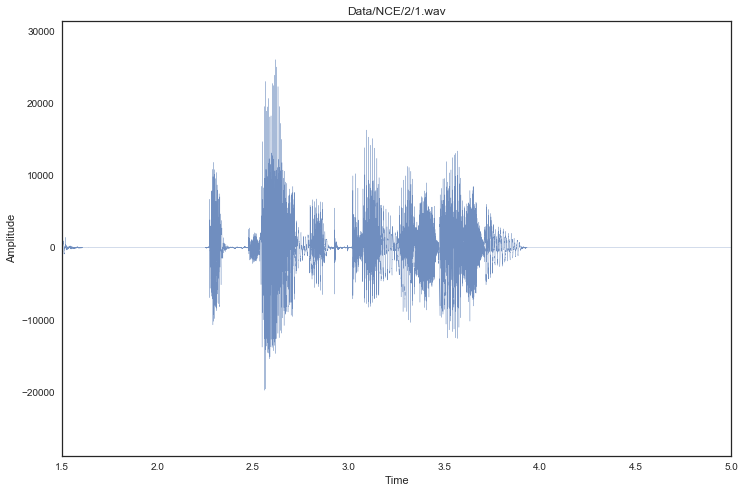

In [38]:
## Get the raw sound data as array
r_np = sound.get_array_of_samples()
sns.set_style("white")
##inspect time vs Amplitude
plt.clf()
plt.figure(figsize=(12, 8))
plt.title(f_wav)
plt.plot(np.linspace(0, len(r_np)/sound.frame_rate, len(r_np)), r_np, linewidth=0.3, alpha=0.8)
#plt.xlim(1.5, 15)
plt.xlim(1.5, 5)
#plt.xlim(5, 9.5)
#plt.xlim(9.5, 15)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

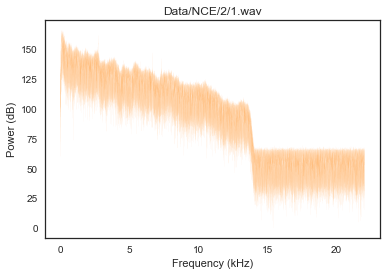

In [7]:
## Frequency analysis, if needed
fourier=fft.fft(r_np)
plt.clf()
# plt.subplot(1, 2, 1)
# plt.plot(fourier, color='#ff7f00')
# plt.xlabel('Frequency')
# plt.ylabel('Amplitude')
# plt.title(f_wav)

n = len(r_np)
fourier = fourier[0:int(n/2)]

# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)
fourier = abs(fourier)
fourier = fourier ** 2

# rebase 0 as the minimal voice
vol =  10*np.log10(fourier) - 10*np.log10(min(fourier))

#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (sound.frame_rate*1.0/n);

# plt.subplot(1, 2, 2)
plt.plot(freqArray/1000, vol, color='#ff7f00', linewidth=0.02)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Power (dB)')
plt.title(f_wav)
plt.show()


***
### Sound file decomposition; split to smaller parts or based on silence
***

In [8]:
## split sound in 10-second slices and export
start_time = time.time()
sound_file = AudioSegment.from_wav(f_wav)
print(sound_file.duration_seconds/60)
for i, chunk in enumerate(sound_file[::30 * 1000]):
  with open("chunk_s" + str(i) + ".wav", "wb") as f:
    chunk.export(f, format="wav")

print("--- %s seconds ---" % (time.time() - start_time))
!ls

1.3065578231292518
--- 0.012733936309814453 seconds ---
Data                    MvpRecordingJun8.ipynb  all_trans.txt
DownloadNPR.ipynb       NlpStudies.ipynb        chunk_s0.wav
DownloadNPRconv.ipynb   Plot                    chunk_s1.wav
DownloadNPRstory.ipynb  README.md               chunk_s2.wav
MVP.ipynb               SphinxPerformance.ipynb run.py
MvpJun15.ipynb          SummaryLDA.ipynb        src
MvpJun7.ipynb           SummaryStudies.ipynb    website
MvpProcessingJun8.ipynb all_sum.txt


In [9]:
#sound_file = AudioSegment.from_wav(f_wav)
print("DURATION", sound_file.duration_seconds)
print("DBFS", sound_file.dBFS, "Max DBFS", sound_file.max_dBFS)
print("RMS", sound_file.rms, np.log(sound_file.rms))
print("Frame rate", sound_file.frame_rate)

DURATION 78.3934693877551
DBFS -21.91979724347295 Max DBFS -1.1749991515185085
RMS 2627 7.87359778969
Frame rate 44100


In [10]:
# #f_wav = "Data/Live/output_8.wav"
# #f_wav = 'Data/NCE/2/1.wav'
# f_wav = 'Data/NPR_story/1.mp3'

# # silence split, if necessary
# start_time = time.time()
# #sound_file = AudioSegment.from_wav(f_wav)
# sound_file = AudioSegment.from_mp3(f_wav)
# audio_chunks = split_on_silence(sound_file, 
#     # must be silent for at least half a second; in ms
#     min_silence_len=500,
#     # keep a part of silence so there is no cutoff ; in ms                           
#     keep_silence=250,
#     # consider it silent; roughly this is 10dB, intensity 1/10 of the ave
#     silence_thresh= (sound_file.dBFS * 1.5 - sound_file.max_dBFS/2))

# print(len(audio_chunks))
# ## split into chunks
# for i, chunk in enumerate(audio_chunks):
#     out_file = "chunk_s{0}.wav".format(i)
#     #print("exporting", out_file, chunk.dBFS, chunk.max_dBFS, chunk.duration_seconds, chunk.rms)
#     chunk.export(out_file, format="wav")

# print("--- %s seconds ---" % (time.time() - start_time))
# #!ls

In [11]:
# print(len(audio_chunks))
# fulldbfs = []
# fullmaxdbfs = []
# fullmax = []
# fullrms = []
# ## split into chunks
# for i, chunk in enumerate(audio_chunks):
#     out_file = "chunk_s{0}.wav".format(i)
#     fulldbfs.append(chunk.dBFS)
#     fullmaxdbfs.append(chunk.max_dBFS)
#     fullmax.append(chunk.max)
#     fullrms.append(chunk.rms)
#     print("exporting", out_file, chunk.dBFS, chunk.max_dBFS, chunk.duration_seconds, chunk.rms)
#     chunk.export(out_file, format="wav")

# print("--- %s seconds ---" % (time.time() - start_time))
# !ls

In [12]:
# fulltextdic = {}
# for i in tqdm(range(42)):
#     fulltextdic.update(SoundToText('chunk_s' + str(i) + '.wav'))

In [13]:
# fulltext = ""
# fulltime = []
# for l in range(len(fulltextdic.keys())):
#     #print(fulltextdic.keys())
#     fulltext += fulltextdic['chunk_s' + str(l) + '.wav'][0] + " ; "
#     fulltime.append(fulltextdic['chunk_s' + str(l) + '.wav'][1])
# print(fulltext)
# print(fulltime)

In [14]:
start_time = time.time()
print(PrepareSound("Data/NPR/0.mp3", fixsplit=False, silencesplit=True).keys())
print("--- %s seconds ---" % (time.time() - start_time))

odict_keys(['Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_0.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_1.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_2.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_3.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_4.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_5.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_6.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_7.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_8.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_9.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_10.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_11.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_12.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_13.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_14.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_15.wav', 'Data/NPR/0eff0c3bb-8651-41ef-bb47-6e48d7ede4d8_16.wav', 'Data/NPR/0eff0c3bb-8651-41ef


***
### Text recognition; and sphinx performance evaluation
***


In [17]:
SoundToText('chunk_s2.wav')

{'chunk_s2.wav': "i said angrily it's none of your business the young man said rudely this is a private conversation"}

In [18]:
table = str.maketrans('', '', string.punctuation)
with open('Data/NCE/2/T' + str(1) + '.TXT', 'r') as myfile:
    realtext=myfile.read().replace('\n', '')
    realtext = realtext.translate(table)
    realtext = realtext.lower()
    realtext = ' '.join(realtext.split()) ## remove the extra space

In [19]:
with open('Data/NCE/2/' + str(1) + '_trans.txt', 'r') as myfile:
    comptext = myfile.read().replace('\n', '')
    comptext = comptext.lower()

In [20]:
def calc_score(ref, comp, debug=False):
    '''gives the number of items in ref that is also found in comp'''
    ## check if it is a list of strings
    if not isinstance(ref, list):
        ref = str(ref).split()
    if not isinstance(comp, list):
        comp = str(comp).split()
        
    s_ref = set(ref)
    s_comp = set(comp)
    s_inter = s_comp.intersection(s_ref)
    if debug:
        print(s_ref, len(s_ref))
        print(s_comp)
        print(s_inter, len(s_inter))
    return len(s_inter)/len(s_ref)

In [21]:
def compare():
    '''compare list of texts in two folders'''
    result = [] ## an array of output wer scores
    for i in range(1, 1 + len(glob.glob("Data/NCE/2/T*.TXT"))):
        table = str.maketrans('', '', string.punctuation)
        ##NCE files
        #print(i)
        with open('Data/NCE/2/T' + str(i) + '.TXT', 'r') as myfile:
            realtext=myfile.read().replace('\n', '')
#         with open('Data/NCE/2/' + str(i) + '.txt', 'r') as myfile:
#             realtext=myfile.read().replace('\n', '')
#             ## removing the punctuation
            realtext = realtext.translate(table)
            realtext = realtext.lower()
            realtext = ' '.join(realtext.split()) ## remove the extra space
        ##translated files
        with open('Data/NCE/2/' + str(i) + '_trans.txt', 'r') as myfile:
            comptext = myfile.read().replace('\n', '')
            comptext = comptext.translate(table)
            comptext = comptext.lower()
        result.append(calc_score(realtext, comptext))
    return np.array(result)

In [22]:
NCE_2 = compare()

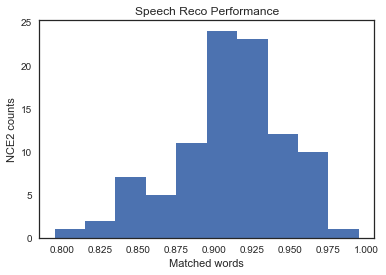

0.909529985494 0.0353798501963


In [23]:
plt.clf()
plt.hist(NCE_2, bins=np.arange(0.795, 1.015, 0.02))
plt.xlabel("Matched words")
plt.ylabel("NCE2 counts")
plt.title("Speech Reco Performance")
plt.savefig("Plot/Speech_Reco_Performance.pdf")
plt.show()
print(NCE_2.mean(), NCE_2.std())

#### May need to remove small files
#### find *.wav  -type f -size -100k -delete

#### For NPR processing

In [4]:
#start_time = time.time()
for i in tqdm(range(0, 314)):
    file_path = "Data/NPR/" ## total 314
    inputtasks = glob.glob(file_path + str(i) + "_*.wav")
    #print(" Running %s jobs on %s cores" % (len(inputtasks), mp.cpu_count()-2))
    npool = min(len(inputtasks), mp.cpu_count()-2)
    pool  = mp.Pool(npool)

    #print(inputtasks)
    inputdic = {}
    for k in range(len(inputtasks)):
        inputdic[k] = {"file":file_path + str(i) + "_" + str(k) + ".wav", "n":i}

    fulltextdic = {}
    ## parallel
    for result in pool.map(SoundToText, inputtasks):
            fulltextdic.update(result)
#     ## standard
#     for i in inputtasks:
#         print(i)
#         result = SoundToText(i) #dictionary of values, plots
#         fulltextdic.update(result)
    
    fulltext = ""
    for k in range(len(fulltextdic.keys())):
        fulltext += fulltextdic[file_path + str(i) + "_" + str(k) + ".wav"]
    #print(fulltext)
    with open(file_path + "_trans.txt", "w") as text_file:
            text_file.write(fulltext)
    pool.close()
#print("--- %s seconds ---" % (time.time() - start_time))

100%|██████████| 61/61 [2:01:38<00:00, 119.65s/it]


#### For NCE processing

In [3]:
#start_time = time.time()
file_path = "Data/NCE/2/" ## total 314
inputtasks = glob.glob(file_path + "*.wav")
print(" Running %s jobs on %s cores" % (len(inputtasks), mp.cpu_count()-2))
npool = min(len(inputtasks), mp.cpu_count()-2)
pool  = mp.Pool(npool)

## parallel
for result in pool.map(SoundToText, inputtasks):  
    fulltext = list(result.values())[0]
    with open(list(result.keys())[0].replace(".wav", "") + "_trans.txt", "w") as text_file:
        text_file.write(fulltext)
            
# ## standard
# for i in inputtasks:
#     print(i)
#     result = SoundToText(i) #dictionary of values, plots
#     fulltext = list(result.values())[0]
#     with open(list(result.keys())[0].replace(".wav", "") + "_trans.txt", "w") as text_file:
#         text_file.write(fulltext)

pool.close()
#print("--- %s seconds ---" % (time.time() - start_time))

 Running 97 jobs on 6 cores


#### Or in steps

In [25]:
# inputtasks = glob.glob("Data/NPR/0_*.wav")
# print(" Running %s jobs on %s cores" % (len(inputtasks), mp.cpu_count()-2))
# npool = min(len(inputtasks), mp.cpu_count()-2)
# pool  = mp.Pool(npool)

# print(inputtasks)
# inputdic = {}
# for i in range(len(inputtasks)):
#     inputdic[i] = {"file":"Data/NPR/0_" + str(i) + ".wav", "n":i}

In [26]:
# start_time = time.time()
# fulltextdic = {}
# for i in inputtasks:
#     result = SoundToText(i) #dictionary of values, plots
#     print(result)
#     fulltextdic.update(result)
# print("--- %s seconds ---" % (time.time() - start_time))

In [27]:
# ## single file processing
# start_time = time.time()
# fulltextdic = {}
# for result in pool.map(SoundToText, inputtasks):
#         fulltextdic.update(result)
# fulltext = ""
# for i in range(len(fulltextdic.keys())):
#     fulltext += fulltextdic["chunk_s" + str(i) + ".wav"]
# print(fulltext)
# print("--- %s seconds ---" % (time.time() - start_time))

In [28]:
with open('Data/NCE/2/T1.TXT', 'r') as myfile:
    realtext=myfile.read().replace('\n', '')
realtext

"               Lesson 1         A private conversation    First listen and then answer the question.    Why did the writer complain to the people behind him?    Last week I went to the theatre. I had a very good seat. The play was very interesting. I did not enjoy it. A young man and a young woman were sitting behind me. They were talking loudly. I got very angry. I could not hear the actors. I turned round. I looked at the man and the woman angrily. They did not pay any attention. In the end, I could not bear it. I turned round again. 'I can't hear a word!' I said angrily.    'It's none of your business,' the young man said rudely. 'This is a private conversation!'"

***
### Text exploration
***

In [29]:
def text_clean(in_text):
    '''clean and remove some common words'''
    tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
    
    # Tokenizing the text
    tokens = tokenizer.tokenize(in_text)
    # A new list to hold the lowercased words
    words = []
    for word in tokens:
        words.append(word.lower())
        
    # Getting the English stop words from nltk
    sw = nltk.corpus.stopwords.words('english')
    
    # A new list to hold Moby Dick with No Stop words
    words_ns = []

    # Appending to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Creating the word frequency distribution
    freqdist = nltk.probability.FreqDist(words_ns)

    # Plotting the word frequency distribution
    plt.clf()
    fig=plt.figure(figsize=(6, 4))
    plt.subplots_adjust(bottom=0.3)
    freqdist.plot(10)
    fig.savefig("Plot/word_freq.pdf", format="pdf")    
    print(freqdist.most_common(5))
    
    out_text = " ".join(str(x) for x in words_ns)
    return out_text

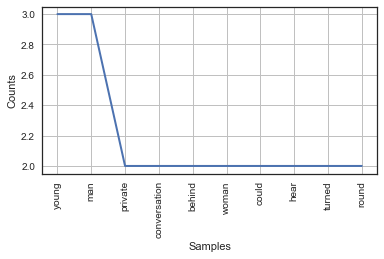

[('young', 3), ('man', 3), ('private', 2), ('conversation', 2), ('behind', 2)]


'lesson 1 private conversation first listen answer question writer complain people behind last week went theatre good seat play interesting enjoy young man young woman sitting behind talking loudly got angry could hear actors turned round looked man woman angrily pay attention end could bear turned round hear word said angrily none business young man said rudely private conversation'

In [30]:
text_clean(realtext)

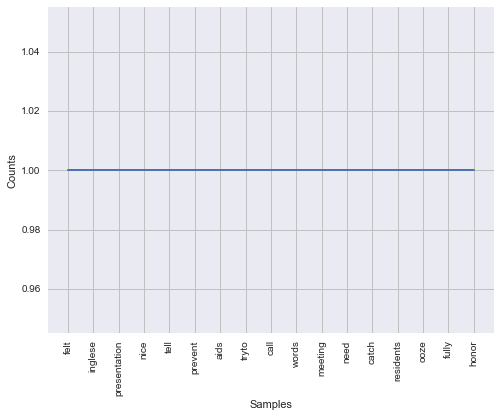

[('felt', 1), ('inglese', 1), ('presentation', 1), ('nice', 1), ('tell', 1)]


'felt inglese presentation nice tell prevent aids tryto call words meeting need catch residents ooze fully honor'

In [113]:
text_clean(fulltext)

## Sumy text summarization

In [3]:
#from __future__ import absolute_import
#from __future__ import division, print_function, unicode_literals

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

LANGUAGE = "english"
SENTENCES_COUNT = 10

#url = "http://www.zsstritezuct.estranky.cz/clanky/predmety/cteni/jak-naucit-dite-spravne-cist.html"
#parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
# or for plain text files
parser = PlaintextParser.from_file("Data/NCE/2/T1.txt", Tokenizer(LANGUAGE))
stemmer = Stemmer(LANGUAGE)

summarizer = Summarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

Lesson 1 A private conversation
First listen and then answer the question.
Why did the writer complain to the people behind him?
A young man and a young woman were sitting behind me.
I could not hear the actors.
I turned round.
I looked at the man and the woman angrily.
I turned round again.
'I can't hear a word!'
'It's none of your business,' the young man said rudely.


***
### Live Audio import
***

In [49]:
def record_live(Name="output", Length=100, Nout=Lseg, Running=False):
    '''this function records audio, length in seconds'''
    start_time = time.time()
    FORMAT = pyaudio.paInt16
    RATE = 32000
    RECORD_SECONDS = Lseg ## fixed 10 sec pieces
    CHANNELS = 1  ##2 for stereo
    CHUNK = 1024

    ## initialize pyaudio
    p = pyaudio.PyAudio()
    
    N_rec = Length/RECORD_SECONDS
    n_rec = 0

    #keypressed = input('Press q to quit: ')
    while n_rec < N_rec:
        stream = p.open(format=FORMAT,
                            channels=CHANNELS,
                            rate=RATE,
                            input=True,
                            frames_per_buffer=CHUNK)
        print("* recording: " + str(n_rec))

        frames = []

        for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
            data = stream.read(CHUNK)
            frames.append(data)

        ## initialize output waveform
        wf = wave.open("Data/Live/" + Name + "_" + str(n_rec) + ".wav", 'wb')
        wf.setnchannels(CHANNELS)
        wf.setsampwidth(p.get_sample_size(FORMAT))
        wf.setframerate(RATE)
        wf.writeframes(b''.join(frames))
        n_rec += 1
        
    stream.stop_stream()
    stream.close()
    p.terminate()

    wf.close()
    print("--- %s seconds ---" % (time.time() - start_time))
    return

In [48]:
!ls Data/Live/
!rm Data/Live/output*
!ls Data/Live/

rm: Data/Live/output*: No such file or directory


In [50]:
record_live(Length=180)

* recording: 0
* recording: 1
* recording: 2
* recording: 3
* recording: 4
* recording: 5
* recording: 6
* recording: 7
* recording: 8
* recording: 9
* recording: 10
* recording: 11
* recording: 12
* recording: 13
* recording: 14
* recording: 15
* recording: 16
* recording: 17
--- 182.67663073539734 seconds ---


In [51]:
!ls Data/Live/

output_0.wav  output_12.wav output_16.wav output_4.wav  output_8.wav
output_1.wav  output_13.wav output_17.wav output_5.wav  output_9.wav
output_10.wav output_14.wav output_2.wav  output_6.wav
output_11.wav output_15.wav output_3.wav  output_7.wav


In [52]:
start_time = time.time()

mytasks = glob.glob("Data/Live/output_*.wav")
print(" Running %s jobs on %s cores" % (len(mytasks), mp.cpu_count()-2))
npool = min(len(mytasks), mp.cpu_count()-2)
pool  = mp.Pool(npool)
print(mytasks)
inputdic = {}
for i in range(len(mytasks)):
    inputdic[i] = {"file":"Data/Live/output_" + str(i) + ".wav", "n":i}
    
mytextdic = {}
for result in pool.map(SoundToText, mytasks):
        mytextdic.update(result)
mytext = ""
for i in range(len(mytextdic.keys())):
    mytext += mytextdic["Data/Live/output_" + str(i) + ".wav"]
print(mytext)
print("--- %s seconds ---" % (time.time() - start_time))

 Running 18 jobs on 6 cores
Data/Live/output_9.wav
Data/Live/output_8.wav
Data/Live/output_11.wav
Data/Live/output_10.wav
Data/Live/output_12.wav
Data/Live/output_13.wav
['Data/Live/output_9.wav', 'Data/Live/output_8.wav', 'Data/Live/output_11.wav', 'Data/Live/output_10.wav', 'Data/Live/output_12.wav', 'Data/Live/output_13.wav', 'Data/Live/output_17.wav', 'Data/Live/output_16.wav', 'Data/Live/output_14.wav', 'Data/Live/output_15.wav', 'Data/Live/output_5.wav', 'Data/Live/output_4.wav', 'Data/Live/output_6.wav', 'Data/Live/output_7.wav', 'Data/Live/output_3.wav', 'Data/Live/output_2.wav', 'Data/Live/output_0.wav', 'Data/Live/output_1.wav']
Data/Live/output_17.wav
Data/Live/output_16.wav
Data/Live/output_14.wav
Data/Live/output_15.wav
Data/Live/output_5.wav
Data/Live/output_4.wav
Data/Live/output_6.wav
Data/Live/output_7.wav
Data/Live/output_3.wav
Data/Live/output_2.wav
Data/Live/output_0.wav
Data/Live/output_1.wav
the level of it though to talk about what or who wishes and c. n. for bre

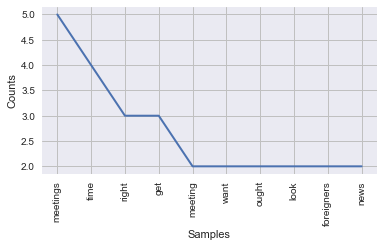

[('meetings', 5), ('time', 4), ('right', 3), ('get', 3), ('meeting', 2)]


'level though talk wishes c n breakfast meeting tax noso problem truth vicious already met la meetings acetate alsowhat called lotto red cells meeting gets rid somebody become take piece paper right nowthe chief wall fast primates useful married matters need us quit itoh want right contras meetings across loot especially meetings alwaysyou want someone nose right go meetings one ought work solution photos ought tothe user letters attend meetings see ghosts shoshone robot use youris product get eighties commerce needy awfully recorded actual moran says altosbut look fatally train pass ideas ready attorney talking aloneif foreigners better time forest usual canceled henry ford gingrich areon phone florida state stories read full outline speaker legal merit isis news bullets doeswhere actually uses like foreigners taxed different levels tar labs social great love exampleand prayer therefore new records means protests rich last time shots horizontal start buta little bit today sports news 

In [140]:
text_clean(mytext)

In [56]:
!ls Plot/

world_freq.pdf


## Sumy text summarization

In [1]:
#from __future__ import absolute_import
#from __future__ import division, print_function, unicode_literals

from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer as Summarizer
from sumy.nlp.stemmers import Stemmer
from sumy.utils import get_stop_words

LANGUAGE = "english"
SENTENCES_COUNT = 10

#url = "http://www.zsstritezuct.estranky.cz/clanky/predmety/cteni/jak-naucit-dite-spravne-cist.html"
#parser = HtmlParser.from_url(url, Tokenizer(LANGUAGE))
# or for plain text files
parser = PlaintextParser.from_file("Data/NCE/2/T1.txt", Tokenizer(LANGUAGE))
stemmer = Stemmer(LANGUAGE)

summarizer = Summarizer(stemmer)
summarizer.stop_words = get_stop_words(LANGUAGE)

for sentence in summarizer(parser.document, SENTENCES_COUNT):
    print(sentence)

Lesson 1 A private conversation
First listen and then answer the question.
Why did the writer complain to the people behind him?
I had a very good seat.
A young man and a young woman were sitting behind me.
I looked at the man and the woman angrily.
In the end, I could not bear it.
'I can't hear a word!'
'It's none of your business,' the young man said rudely.
'This is a private conversation!'
